### Import the Data

In [1]:
# Import the required libraries and dependencies
import pandas as pd
from pathlib import Path
%matplotlib inline
import numpy as np


ModuleNotFoundError: No module named 'matplotlib'

In [3]:
# Import the data by reading in the CSV file and setting the DatetimeIndex 
# Review the first 5 rows of the DataFrame
whale_df = pd.read_csv(
    Path("./resources/whale_navs.csv"),
    index_col="date",
    parse_dates=True,
    infer_datetime_format=True)

whale_df.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-01,31.950240,14.991826,59.977830,51.948712,194.35
2014-10-02,31.936110,14.994072,59.978626,51.957619,194.38
2014-10-03,31.969707,14.999596,60.002264,52.022484,196.52
2014-10-06,32.048215,14.999471,60.006244,52.036387,196.29
2014-10-07,31.964216,14.994720,59.993735,52.005864,193.26


In [3]:
# Prepare for the analysis by converting the dataframe of NAVs and prices to daily returns
# Drop any rows with all missing values
# Review the first five rows of the daily returns DataFrame.
whale_df = whale_df.pct_change().dropna()
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-02,-0.000442,0.000150,0.000013,0.000171,0.000154
2014-10-03,0.001052,0.000368,0.000394,0.001248,0.011009
2014-10-06,0.002456,-0.000008,0.000066,0.000267,-0.001170
2014-10-07,-0.002621,-0.000317,-0.000208,-0.000587,-0.015436
2014-10-08,0.000390,0.000369,0.000242,0.000842,0.017489


---

<AxesSubplot:title={'center':'Whale Daily Returns'}, xlabel='date'>

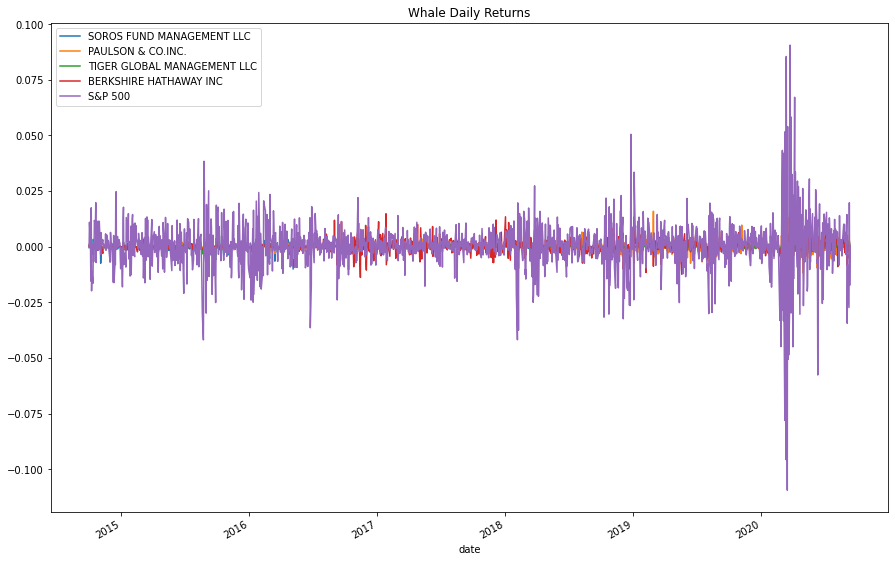

In [4]:
# Plot the daily return data of the 4 funds and the S&P 500 
# Inclue a title parameter and adjust the figure size
whale_df.plot(legend=True, figsize=(15, 10), title="Whale Daily Returns")


In [5]:
# Calculate and plot the cumulative returns of the 4 fund portfolios and the S&P 500
# Review the last 5 rows of the cumulative returns DataFrame
cum_returns = (1 + whale_df).cumprod() -1
cum_returns.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2020-09-04,-0.012645,-0.041813,0.055714,0.244856,0.762645
2020-09-08,-0.014360,-0.043622,0.054373,0.238608,0.714484
2020-09-09,-0.013261,-0.041591,0.057221,0.240858,0.748341
2020-09-10,-0.014502,-0.040260,0.055539,0.237883,0.717983
2020-09-11,-0.014914,-0.042113,0.055081,0.236625,0.718858


<AxesSubplot:title={'center':'Cum Returns of Whale Funds and S&P500'}, xlabel='date'>

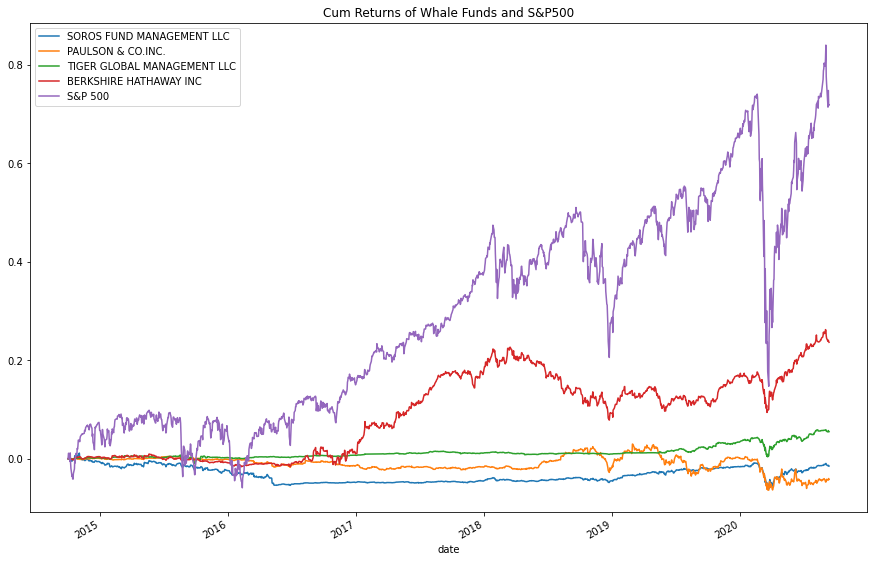

In [29]:
# Visualize the cumulative returns using the Pandas plot function
cum_returns.plot(legend=True, figsize=(15,10), title="Cumulative Returns of Whale Funds and S&P500")


#### Step 4: Answer the following question: Based on the cumulative return data and the visualization, do any of the four fund portfolios outperform the S&P 500 Index?

**Question** Based on the cumulative return data and the visualization, do any of the four fund portfolios outperform the S&P 500 Index?

**Answer** No they do not

---

### Analyze the Volatility

Analyze the volatility of each of the four fund portfolios and of the S&P 500 Index by using box plots.

#### Step 1: Use the Pandas `plot` function and the `kind="box"` parameter to visualize the daily return data for each of the four portfolios and for the S&P 500 in a box plot. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Cumulative Returns of Whale Funds and S&P500'}>

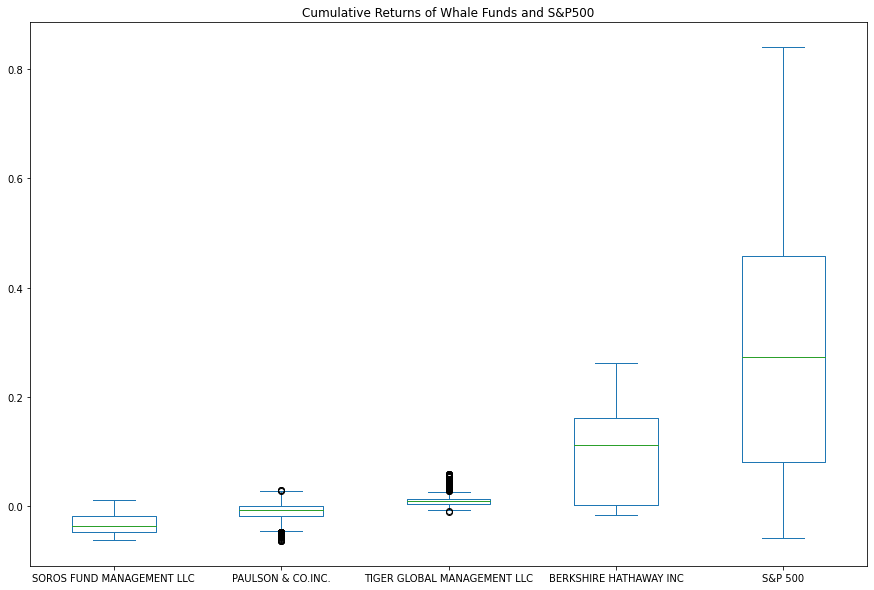

In [30]:
# Use the daily return data to create box plots to visualize the volatility of the 4 funds and the S&P 500 
cum_returns.plot(legend=True, figsize=(15,10), kind='box', title="Cumulative Returns of Whale Funds and S&P500")


<AxesSubplot:title={'center':'Cumulative Returns of Whale Funds'}>

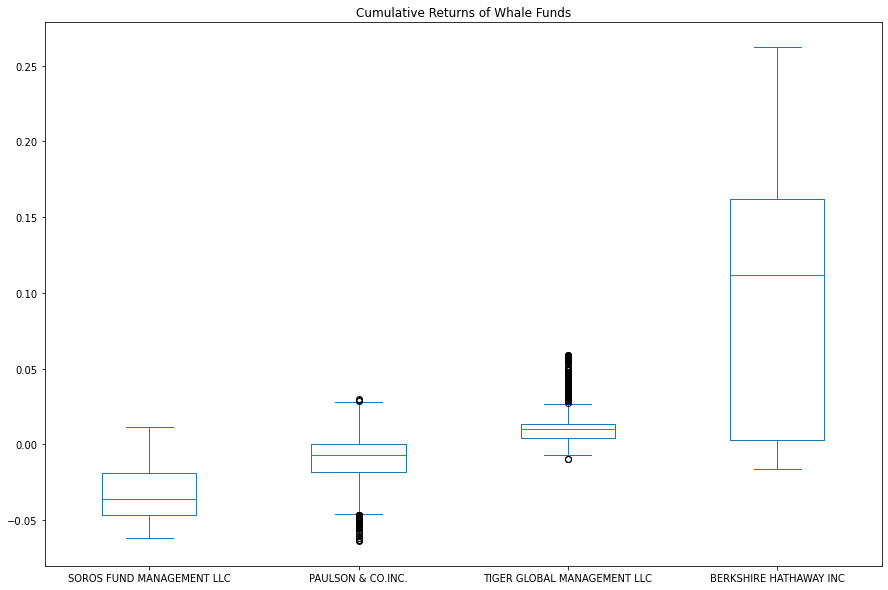

In [31]:
# Create a new DataFrame containing only the 4 fund portfolios by dropping the S&P 500 column from the DataFrame
cum_returns_whales_df = cum_returns.drop(columns=['S&P 500'])
cum_returns_whales_df.plot(legend=True, figsize=(15,10), kind='box', title='Cumulative Returns of Whale Funds')


---

In [32]:
# Calculate and sort the standard deviation for all 4 portfolios and the S&P 500
# Review the standard deviations sorted smallest to largest
std_dev_all_df = whale_df.std()
std_dev_all_df.sort_values()


TIGER GLOBAL MANAGEMENT LLC    0.000996
SOROS FUND MANAGEMENT LLC      0.001405
PAULSON & CO.INC.              0.002199
BERKSHIRE HATHAWAY INC         0.003256
S&P 500                        0.011550
dtype: float64

In [34]:
# Calculate and sort the annualized standard deviation (252 trading days) of the 4 portfolios and the S&P 500
# Review the annual standard deviations smallest to largest
annualized_std_deviation_df = std_dev_all_df*np.sqrt(252)
annualized_std_deviation_df.sort_values()


TIGER GLOBAL MANAGEMENT LLC    0.015804
SOROS FUND MANAGEMENT LLC      0.022297
PAULSON & CO.INC.              0.034912
BERKSHIRE HATHAWAY INC         0.051692
S&P 500                        0.183345
dtype: float64

<AxesSubplot:title={'center':'21-Day Rolling Window Standard Deviation'}, xlabel='date'>

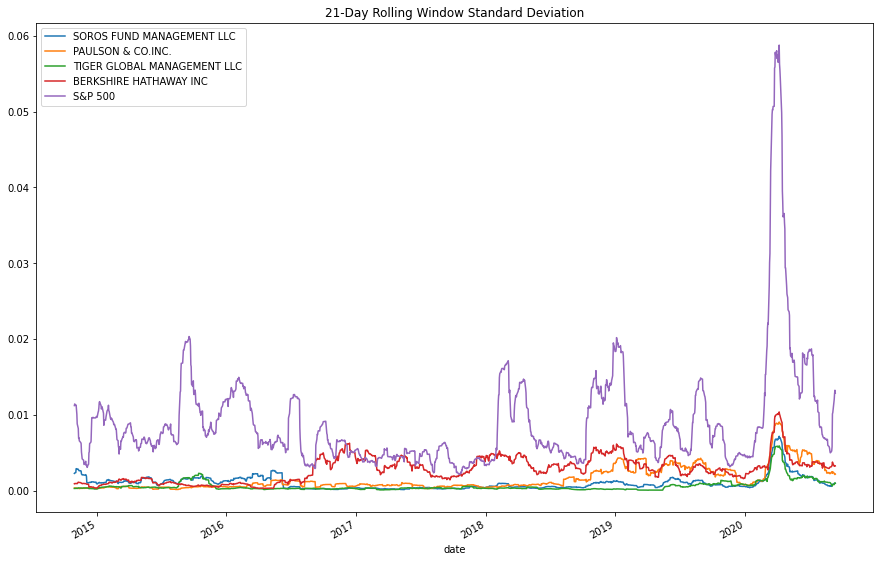

In [35]:
# Using the daily returns DataFrame and a 21-day rolling window, 
# plot the rolling standard deviation of the 4 portfolios and the S&P 500
whale_df.rolling(window=21).std().plot(legend=True,figsize=(15,10), title='21-Day Rolling Window Standard Deviation')


<AxesSubplot:title={'center':'21-Dat Rolling Window Whale Standard Deviation'}, xlabel='date'>

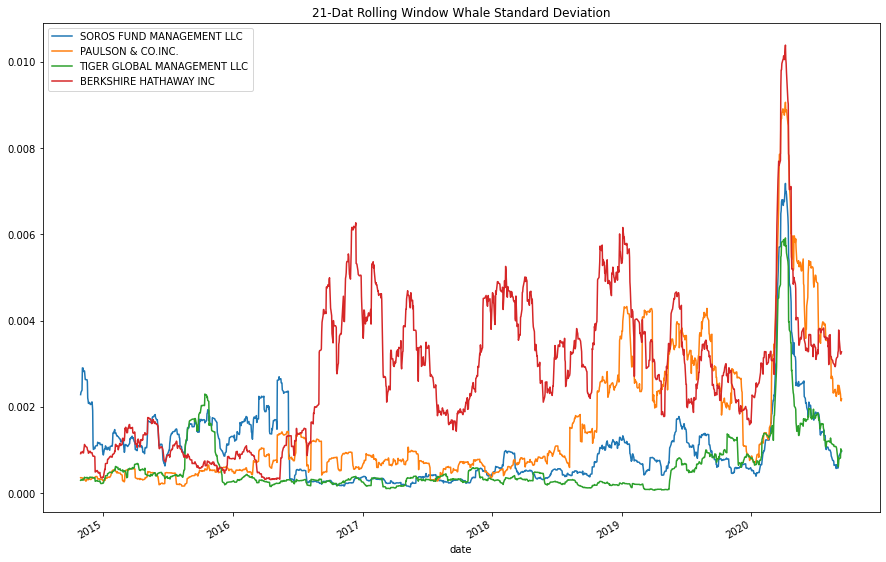

In [36]:
# Using the daily return data and a 21-day rolling window, plot the rolling standard deviation of just the 4 portfolios. 
rolling_whale_std_deviation_df = whale_df.drop(columns=['S&P 500'])
rolling_whale_std_deviation_df.rolling(window=21).std().plot(legend=True, figsize=(15,10), title='21-Dat Rolling Window Whale Standard Deviation')


---

In [38]:
# Calculate the annual average return data for the for fund portfolios and the S&P 500
annual_avg_return = whale_df.mean() * 252
annual_avg_return.sort_values()

PAULSON & CO.INC.             -0.006633
SOROS FUND MANAGEMENT LLC     -0.002281
TIGER GLOBAL MANAGEMENT LLC    0.009151
BERKSHIRE HATHAWAY INC         0.037090
S&P 500                        0.108102
dtype: float64

In [39]:
# Calculate the annualized Sharpe Ratios for each of the 4 portfolios and the S&P 500.
sharp_ratios = annual_avg_return / annualized_std_deviation_df
sharp_ratios.sort_values()

PAULSON & CO.INC.             -0.189998
SOROS FUND MANAGEMENT LLC     -0.102290
TIGER GLOBAL MANAGEMENT LLC    0.579002
S&P 500                        0.589612
BERKSHIRE HATHAWAY INC         0.717512
dtype: float64

<AxesSubplot:title={'center':'Sharp Ratios of Whale Funds'}>

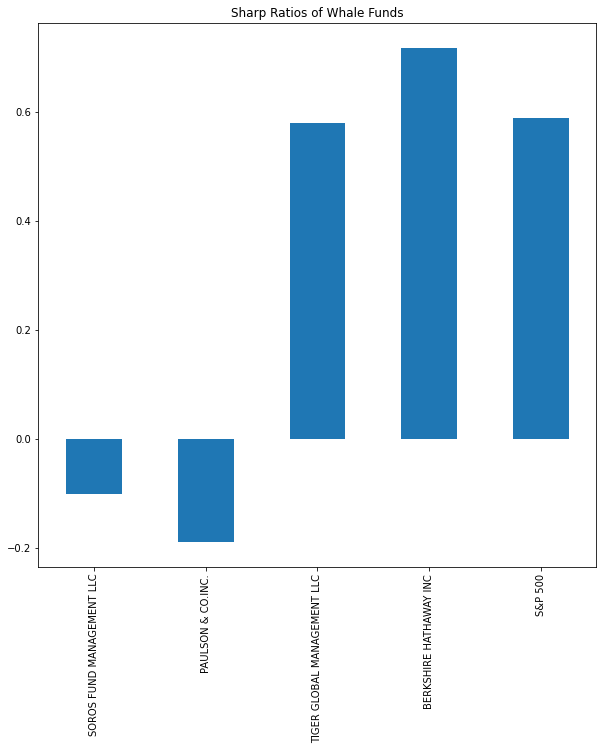

In [42]:
# Visualize the Sharpe ratios as a bar chart
sharp_ratios.plot.bar(figsize=(10, 10),title='Sharp Ratios of Whale Funds')


---

In [44]:
# Calculate the variance of the S&P 500 using a rolling 60-day window.
sp500_variance_df = whale_df['S&P 500'].rolling(window=60).var()
sp500_variance_df

date
2014-10-02         NaN
2014-10-03         NaN
2014-10-06         NaN
2014-10-07         NaN
2014-10-08         NaN
                ...   
2020-09-04    0.000103
2020-09-08    0.000116
2020-09-09    0.000120
2020-09-10    0.000121
2020-09-11    0.000120
Name: S&P 500, Length: 1497, dtype: float64

In [45]:
# Calculate the covariance using a 60-day rolling window 
berkshire_covariance_df = whale_df['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(whale_df['S&P 500'])
berkshire_covariance_df.tail()


date
2020-09-04    0.000021
2020-09-08    0.000023
2020-09-09    0.000024
2020-09-10    0.000024
2020-09-11    0.000024
dtype: float64

In [46]:
# Calculate the beta based on the 60-day rolling covariance compared to the market (S&P 500)
berkshire_beta_df = berkshire_covariance_df / sp500_variance_df
berkshire_beta_df.tail()


date
2020-09-04    0.207879
2020-09-08    0.203051
2020-09-09    0.196632
2020-09-10    0.197543
2020-09-11    0.199411
dtype: float64

In [47]:
# Calculate the average of the 60-day rolling beta
berkshire_beta_df.mean()


0.2214986101354593

<AxesSubplot:title={'center':'Berkshire Hathaway 60-Day Rolling Beta'}, xlabel='date'>

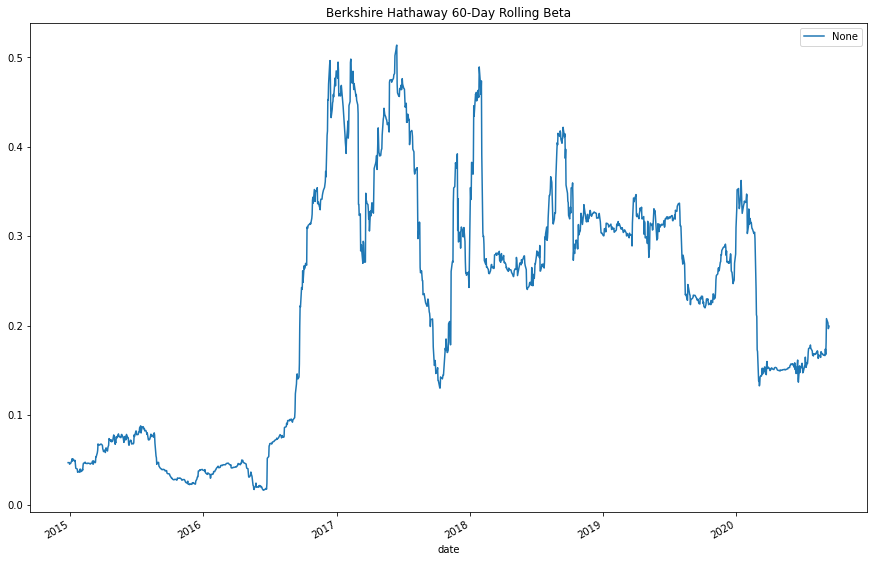

In [48]:
# Plot the rolling beta 
berkshire_beta_df.plot(legend=True, figsize=(15,10), title='Berkshire Hathaway 60-Day Rolling Beta')


In [51]:
# Calculate the covariance using a 60-day rolling window 
# Review the last five rows of the covariance data
tiger_covariance_df = whale_df['TIGER GLOBAL MANAGEMENT LLC'].rolling(window=60).cov(whale_df['S&P 500'])
tiger_covariance_df.tail()

date
2020-09-04    0.000008
2020-09-08    0.000009
2020-09-09    0.000010
2020-09-10    0.000010
2020-09-11    0.000010
dtype: float64

In [52]:
# Calculate the beta based on the 60-day rolling covariance compared to the market (S&P 500)
# Review the last five rows of the beta information
tiger_beta = tiger_covariance_df / sp500_variance_df
tiger_beta.tail()


date
2020-09-04    0.081061
2020-09-08    0.076672
2020-09-09    0.079575
2020-09-10    0.080934
2020-09-11    0.081378
dtype: float64

In [53]:
# Calculate the average of the 60-day rolling beta
tiger_beta.mean()


0.03093001487238774

<AxesSubplot:title={'center':'Tiger Global Management 60-Day Rolling Beta'}, xlabel='date'>

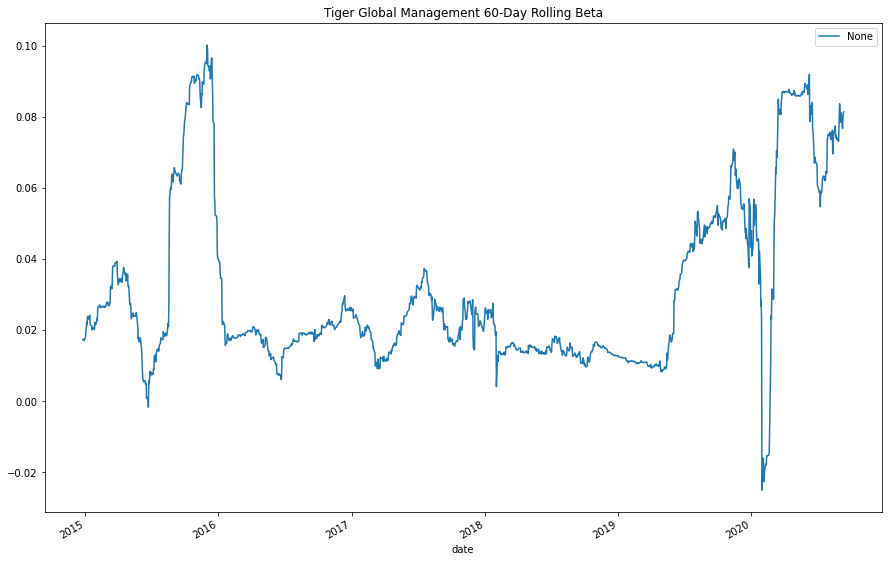

In [54]:
# Plot the rolling beta 
# Include a title parameter and adjust the figure size
tiger_beta.plot(legend=True, figsize=(15,10), title='Tiger Global Management 60-Day Rolling Beta')


---